# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# 1. Is the distribution of body temperatures normal?

In [5]:
temp = df['temperature']
stats.normaltest(temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

From the normal test, the p-value is approx 25.9% which is greater than the 5% significance level hence we fail to reject the null hypothesis (i.e. temp is normally distributed) because we do not have enough evidence to conclude that the data set does not follow a normal distribution. Let's check further using histograms and ECDF.

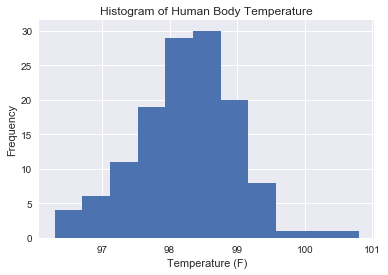

In [6]:
# Plot Histrogram
sns.set()
plt.hist(temp,bins=11)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Histogram of Human Body Temperature')
plt.show()

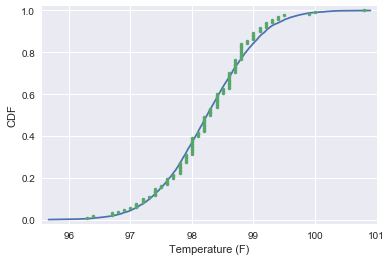

In [7]:
# Plot theoretical CDF and ECDF
x  = np.sort(temp)
y = np.arange(1, len(x)+1) / len(x)
mean = np.mean(temp)
std = np.std(temp)
samples = np.random.normal(mean, std, size=10000)
x_theor = np.sort(samples)
y_theor = np.arange(1, len(x_theor)+1) / len(x_theor)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
plt.margins(0.02) #keeps data off plot edges
plt.show()

The 2 graphs above seem to suggest that the distribution of body temperature is normal.

# 2. Is the sample size large? Are the observations independent?

The data set has 130 observations which is considered large as it has a sample size greater than 30. The observations are independent of each other since the measurement of one individual's body temperature does not influence another's.

# 3. Is the true population mean really 98.6 degrees F?

In [8]:
# Null hypothesis: the true population mean is 98.6 degrees F
# Try a bootstrap hypothesis test
bs_sample = np.random.choice(temp,size=100)
print('mean:',np.mean(bs_sample))
print('median:',np.median(bs_sample))
print('std:',np.std(bs_sample))

mean: 98.225
median: 98.2
std: 0.805900117881


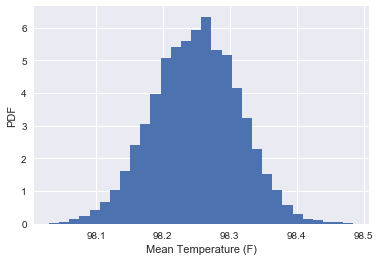

In [9]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(temp, np.mean) 

_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('Mean Temperature (F)')
_ = plt.ylabel('PDF')
plt.show()

In [10]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5]) 
print(conf_int)

[ 98.12307692  98.37384615]


We're 95% confident that the true population mean is between 98.13 degrees F and 98.37 degrees F.

As we're comparing one set of data to a single number (i.e. 98.6 degrees F), we'll use the one sample test. While the sample size is large (n > 30), we do not know the population standard deviation so we'll use the t statistic.

In [11]:
# Calculate the t-statistic
(temp.mean()-98.6) / (temp.std()/math.sqrt(130))

-5.454823292364079

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

We could definte "abnormal" temperatures as those that fall outside the range where 95% of observations are i.e. between 98.13 degrees F and 98.37 degrees F.

# 6. Is there a significant difference between males and females in normal temperature?

In [12]:
# Use two sample t-test hypothesis
males = df[df.gender == "M"]
females = df[df.gender == "F"]
print('number of males:',len(males))
print('number of females:',len(females))

number of males: 65
number of females: 65


In [13]:
stats.ttest_ind(males['temperature'], females['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

The p-value is < 5% so we should reject the hypothesis that the mean temperature between males and females are the same.